# Demonstration of `dead_leaves` usage

## Import

In [1]:
from dead_leaves import DeadLeavesImage, DeadLeavesModel
import torch

%reload_ext autoreload
%autoreload 2

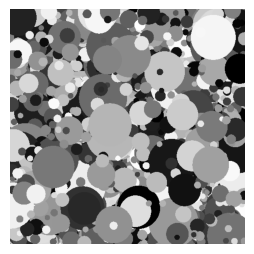

In [30]:
model = DeadLeavesModel(
    shape = "circular", 
    param_distributions = {
        "area": {"powerlaw": {"low": 100.0, "high": 10000.0, "k": 1.5}}
        },
    size = (512,512)
)
leaves, partition = model.sample_partition()

colormodel = DeadLeavesImage(
    leaves = leaves, 
    partition = partition, 
    color_param_distributions = {"gray": {"uniform": {"low": 0.0, "high": 1.0}}}
    )
image = colormodel.sample_image()

colormodel.show(image, figsize = (3,3))
colormodel.save(image, "../docs/_static/figures/circles.png")

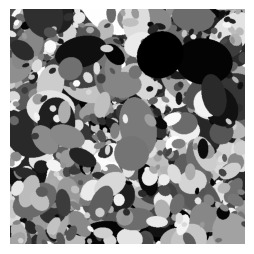

In [31]:
model = DeadLeavesModel(
    shape = "ellipsoid", 
    param_distributions = {
        "area": {"powerlaw": {"low": 100.0, "high": 10000.0, "k": 1.5}},
        "orientation": {"uniform": {"low": 0.0, "high": 2 * torch.pi}},
        "aspect_ratio": {"uniform": {"low": 0.5, "high": 2}}
        },
    size = (512,512)
)
leaves, partition = model.sample_partition()

colormodel = DeadLeavesImage(
    leaves = leaves, 
    partition = partition, 
    color_param_distributions = {"gray": {"uniform": {"low": 0.0, "high": 1.0}}}
    )
image = colormodel.sample_image()

colormodel.show(image, figsize = (3,3))
colormodel.save(image, "../docs/_static/figures/ellipsoids.png")

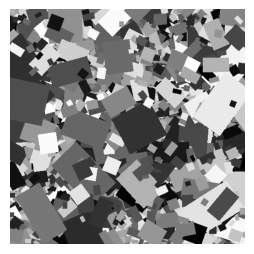

In [32]:
model = DeadLeavesModel(
    shape = "rectangular", 
    param_distributions = {
        "area": {"powerlaw": {"low": 100.0, "high": 10000.0, "k": 1.5}},
        "orientation": {"uniform": {"low": 0.0, "high": 2 * torch.pi}},
        "aspect_ratio": {"uniform": {"low": 0.5, "high": 2}}
        },
    size = (512,512)
)
leaves, partition = model.sample_partition()

colormodel = DeadLeavesImage(
    leaves = leaves, 
    partition = partition, 
    color_param_distributions = {"gray": {"uniform": {"low": 0.0, "high": 1.0}}}
    )
image = colormodel.sample_image()

colormodel.show(image, figsize = (3,3))
colormodel.save(image, "../docs/_static/figures/rectangles.png")

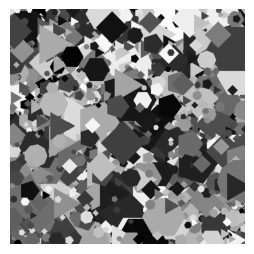

In [33]:
model = DeadLeavesModel(
    shape = "polygon", 
    param_distributions = {
        "area": {"powerlaw": {"low": 100.0, "high": 10000.0, "k": 1.5}},
        "n_vertices": {"poisson": {"rate": 5}},
        },
    size = (512,512)
)
leaves, partition = model.sample_partition()

colormodel = DeadLeavesImage(
    leaves = leaves, 
    partition = partition, 
    color_param_distributions = {"gray": {"uniform": {"low": 0.0, "high": 1.0}}}
    )
image = colormodel.sample_image()

colormodel.show(image, figsize = (3,3))
colormodel.save(image, "../docs/_static/figures/polygons.png")

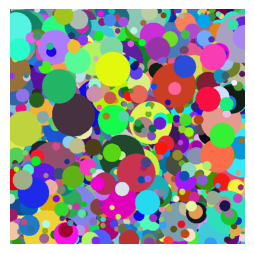

In [34]:
model = DeadLeavesModel(
    shape = "circular", 
    param_distributions = {"area": {"powerlaw": {"low": 100.0, "high": 10000.0, "k": 1.5}}},
    size = (512,512)
)
leaves, partition = model.sample_partition()

colormodel = DeadLeavesImage(
    leaves = leaves, 
    partition = partition, 
    color_param_distributions = {
        "R": {"uniform": {"low": 0.0, "high": 1.0}},
        "G": {"uniform": {"low": 0.0, "high": 1.0}},
        "B": {"uniform": {"low": 0.0, "high": 1.0}}
        }
    )
image = colormodel.sample_image()

colormodel.show(image, figsize = (3,3))
colormodel.save(image, "../docs/_static/figures/RGB.png")

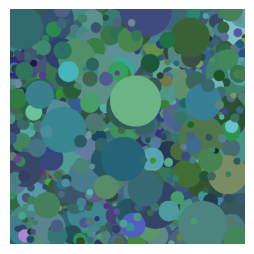

In [35]:
model = DeadLeavesModel(
    shape = "circular", 
    param_distributions = {"area": {"powerlaw": {"low": 100.0, "high": 10000.0, "k": 1.5}}},
    size = (512,512)
)
leaves, partition = model.sample_partition()

colormodel = DeadLeavesImage(
    leaves = leaves, 
    partition = partition, 
    color_param_distributions = {
        "H": {"normal": {"loc": 0.5, "scale": 0.1}},
        "S": {"normal": {"loc": 0.5, "scale": 0.1}},
        "V": {"normal": {"loc": 0.5, "scale": 0.1}}
        }
    )
image = colormodel.sample_image()

colormodel.show(image, figsize = (3,3))
colormodel.save(image, "../docs/_static/figures/HSV.png")

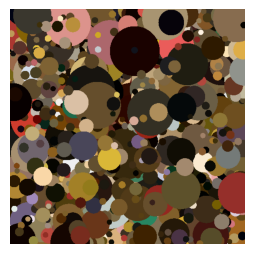

In [36]:
model = DeadLeavesModel(
    shape = "circular", 
    param_distributions = {"area": {"powerlaw": {"low": 100.0, "high": 10000.0, "k": 1.5}}},
    size = (512,512)
)
leaves, partition = model.sample_partition()

colormodel = DeadLeavesImage(
    leaves = leaves, 
    partition = partition, 
    color_param_distributions = {
        "source": {"image": {"dir": "/home/swantje/datasets/places365"}},
        }
    )
image = colormodel.sample_image()

colormodel.show(image, figsize = (3,3))
colormodel.save(image, "../docs/_static/figures/natural_color.png")

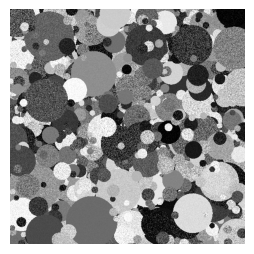

In [37]:
model = DeadLeavesModel(
    shape = "circular", 
    param_distributions = {"area": {"powerlaw": {"low": 100.0, "high": 10000.0, "k": 1.5}}},
    size = (512,512)
)
leaves, partition = model.sample_partition()

colormodel = DeadLeavesImage(
    leaves = leaves, 
    partition = partition, 
    color_param_distributions = {"gray": {"uniform": {"low": 0.0, "high": 1.0}}},
    texture_param_distributions = {
        "gray": {
            "normal": {
                "loc": 0, 
                "scale": {"uniform": {"low": 0.01, "high": 0.2}}
                }
            }
        }
    )
image = colormodel.sample_image()

colormodel.show(image, figsize = (3,3))
colormodel.save(image, "../docs/_static/figures/leafwise_texture.png")

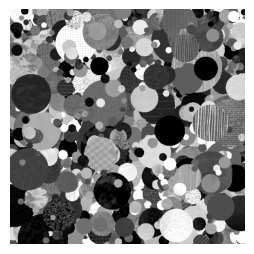

In [38]:
model = DeadLeavesModel(
    shape = "circular", 
    param_distributions = {"area": {"powerlaw": {"low": 100.0, "high": 10000.0, "k": 1.5}}},
    size = (512,512)
)
leaves, partition = model.sample_partition()

colormodel = DeadLeavesImage(
    leaves = leaves, 
    partition = partition, 
    color_param_distributions = {"gray": {"uniform": {"low": 0.1, "high": 0.9}}},
    texture_param_distributions = {
        "source": {"image": {"dir": "/home/swantje/datasets/brodatz"}},
        "alpha": {"normal": {"loc": 0.0, "scale": 0.5}},
    }
    )
image = colormodel.sample_image()

colormodel.show(image, figsize = (3,3))
colormodel.save(image, "../docs/_static/figures/texture_patch.png")

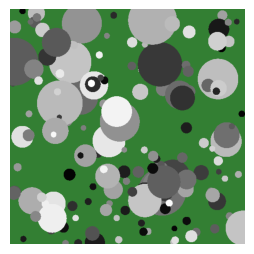

In [39]:
model = DeadLeavesModel(
    shape = "circular", 
    param_distributions = {"area": {"powerlaw": {"low": 100.0, "high": 10000.0, "k": 1.5}}},
    size = (512,512),
    n_sample = 150
)
leaves, partition = model.sample_partition()

colormodel = DeadLeavesImage(
    leaves = leaves, 
    partition = partition, 
    color_param_distributions = {"gray": {"uniform": {"low": 0.0, "high": 1.0}}},
    background_color=torch.tensor([0.2,0.5,0.2])
    )
image = colormodel.sample_image()

colormodel.show(image, figsize = (3,3))
colormodel.save(image, "../docs/_static/figures/sparse_sampling.png")

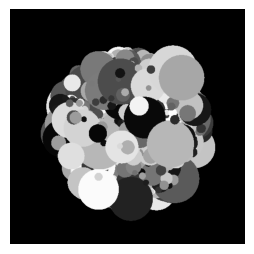

In [40]:
from dead_leaves.leaf_masks import circular

X, Y = torch.meshgrid(
    torch.arange(512),
    torch.arange(512),
    indexing="xy",
)
position_mask = circular((X,Y), {"area": torch.tensor(80000), "x_pos": 256, "y_pos": 256})

model = DeadLeavesModel(
    shape = "circular", 
    param_distributions = {"area": {"powerlaw": {"low": 100.0, "high": 10000.0, "k": 1.5}}},
    size = (512,512),
    position_mask = position_mask
)
leaves, partition = model.sample_partition()

colormodel = DeadLeavesImage(
    leaves = leaves, 
    partition = partition, 
    color_param_distributions = {"gray": {"uniform": {"low": 0.0, "high": 1.0}}}
    )
image = colormodel.sample_image()

colormodel.show(image, figsize = (3,3))
colormodel.save(image, "../docs/_static/figures/position_mask.png")

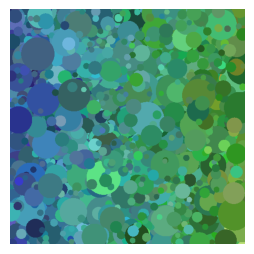

In [41]:
model = DeadLeavesModel(
    shape = "circular", 
    param_distributions = {"area": {"powerlaw": {"low": 100.0, "high": 5000.0, "k": 1.5}}},
    size = (512,512)
)
leaves, partition = model.sample_partition()

colormodel = DeadLeavesImage(
    leaves = leaves, 
    partition = partition, 
    color_param_distributions = {
        "H": {"normal": {
            "loc": {"from": "x_pos", "fn": lambda x: 1/512*x * 0.3 + (1-1/512*x) * 0.6}, 
            "scale": 0.05
        }},
        "S": {"normal": {"loc": 0.6, "scale": 0.1}},
        "V": {"normal": {"loc": 0.6, "scale": 0.1}}
        }
    )
image = colormodel.sample_image()

colormodel.show(image, figsize = (3,3))
colormodel.save(image, "../docs/_static/figures/single_feature_dependency.png")

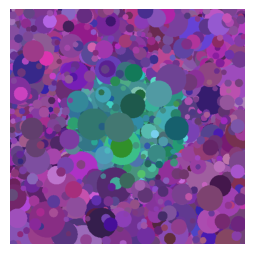

In [42]:
import numpy

model = DeadLeavesModel(
    shape = "circular", 
    param_distributions = {"area": {"powerlaw": {"low": 100.0, "high": 5000.0, "k": 1.5}}},
    size = (512,512)
)
leaves, partition = model.sample_partition()

def fn(d):
    distance_from_center = numpy.sqrt((256 - d["x_pos"]) ** 2 + (256 - d["y_pos"]) ** 2)
    return numpy.where(distance_from_center <= 128, 0.5, 0.8)

colormodel = DeadLeavesImage(
    leaves = leaves, 
    partition = partition, 
    color_param_distributions = {
        "H": {"normal": {
            "loc": {"from": ["x_pos","y_pos"], "fn": fn}, 
            "scale": 0.05
        }},
        "S": {"normal": {"loc": 0.6, "scale": 0.1}},
        "V": {"normal": {"loc": 0.6, "scale": 0.1}}
        }
    )
image = colormodel.sample_image()

colormodel.show(image, figsize = (3,3))
colormodel.save(image, "../docs/_static/figures/dual_feature_dependency.png")

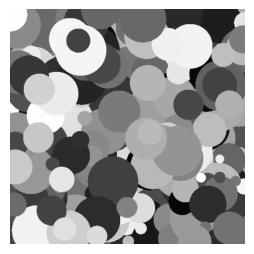

In [43]:
model = DeadLeavesModel(
    shape = "circular", 
    param_distributions = {
        "area": {"uniform": {"low": 100.0, "high": 10000.0}}
        },
    size = (512,512)
)
leaves, partition = model.sample_partition()

colormodel = DeadLeavesImage(
    leaves = leaves, 
    partition = partition, 
    color_param_distributions = {"gray": {"uniform": {"low": 0.0, "high": 1.0}}}
    )
image = colormodel.sample_image()

colormodel.show(image, figsize = (3,3))
colormodel.save(image, "../docs/_static/figures/uniform_size.png")

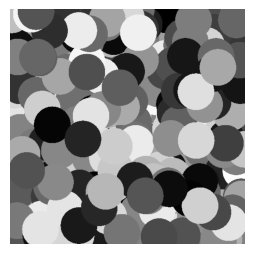

In [44]:
model = DeadLeavesModel(
    shape = "circular", 
    param_distributions = {
        "area": {"constant": {"value": 5000.0}}
        },
    size = (512,512)
)
leaves, partition = model.sample_partition()

colormodel = DeadLeavesImage(
    leaves = leaves, 
    partition = partition, 
    color_param_distributions = {"gray": {"uniform": {"low": 0.0, "high": 1.0}}}
    )
image = colormodel.sample_image()

colormodel.show(image, figsize = (3,3))
colormodel.save(image, "../docs/_static/figures/constant_size.png")

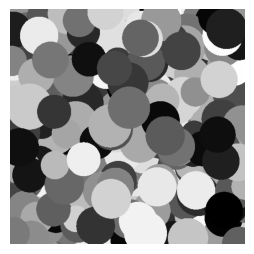

In [45]:
model = DeadLeavesModel(
    shape = "circular", 
    param_distributions = {
        "area": {"normal": {"loc": 5000.0, "scale": 1000.0}}
        },
    size = (512,512)
)
leaves, partition = model.sample_partition()

colormodel = DeadLeavesImage(
    leaves = leaves, 
    partition = partition, 
    color_param_distributions = {"gray": {"uniform": {"low": 0.0, "high": 1.0}}}
    )
image = colormodel.sample_image()

colormodel.show(image, figsize = (3,3))
colormodel.save(image, "../docs/_static/figures/normal_size.png")

## Single image generation

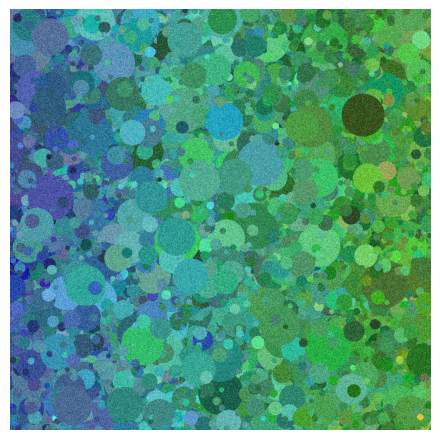

In [20]:
shape_params = {
    'area': {'powerlaw': {'low': 100.0, 'high': 10000.0, 'k': 1.5}}
}

model1 = DeadLeavesModel(
    "circular", 
    shape_params,
    (1000,1000)
    )
leaves, partition = model1.sample_partition()

color_params = {
    'H': {'normal': {
        'loc': {'from': 'x_pos', 'fn': lambda x: 0.001*x * 0.3 + (1-0.001*x) * 0.6}, 
        'scale': 0.05
        }},
    'S': {'normal': {'loc': 0.6, 'scale': 0.1}},
    'V': {'normal': {'loc': 0.6, 'scale': 0.1}}
}

texture_params = {
    'gray': {'normal': {'loc': 0, 'scale': 0.1}}
}

colormodel1 = DeadLeavesImage(
    leaves, 
    partition, 
    color_params, 
    texture_params
    )
image = colormodel1.sample_image()
colormodel1.show(image)

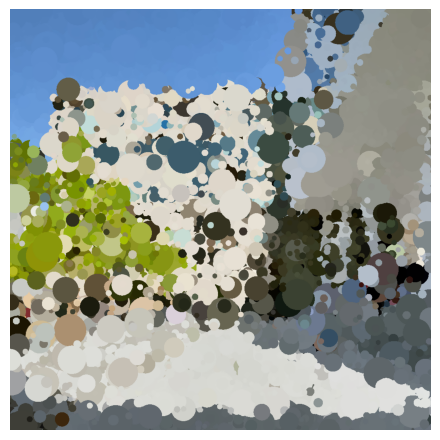

In [34]:
from PIL import Image
from torchvision.transforms.functional import pil_to_tensor

reference_image = Image.open('ulb_5136-2516.jpg').resize((1000,1000), box=[0,0,2500,2500])

image_tensor = pil_to_tensor(pic=reference_image) / 255

shape_params = {
    'area': {'powerlaw': {'low': 100.0, 'high': 5000.0, 'k': 1.5}}
}

model1 = DeadLeavesModel(
    "circular", 
    shape_params,
    (1000,1000)
    )
leaves, partition = model1.sample_partition()

color_params = {
    'R': {'constant': {'value': {'from': ['x_pos','y_pos'], 'fn': lambda x: image_tensor[0,x['y_pos'].astype(int),x['x_pos'].astype(int)]}}},
    'G': {'constant': {'value': {'from': ['x_pos','y_pos'], 'fn': lambda x: image_tensor[1,x['y_pos'].astype(int),x['x_pos'].astype(int)]}}},
    'B': {'constant': {'value': {'from': ['x_pos','y_pos'], 'fn': lambda x: image_tensor[2,x['y_pos'].astype(int),x['x_pos'].astype(int)]}}}
}

texture_params = {
    'gray': {'constant': {'value': 0}}
}

colormodel1 = DeadLeavesImage(
    leaves, 
    partition, 
    color_params, 
    texture_params
    )
image = colormodel1.sample_image()
colormodel1.show(image)

## Mask

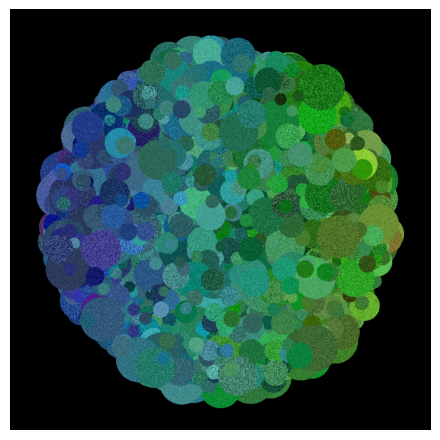

In [16]:
import torch
from dead_leaves.leaf_masks import circular

X,Y = torch.meshgrid(
    torch.arange(1000), torch.arange(1000), indexing='ij'
)

position_mask = circular(
    (X,Y),
    {
        'x_pos': 500,
        'y_pos': 500, 
        'area': torch.tensor([500000])
        }
)

model = DeadLeavesModel(
    "circular",
    {"area": {"powerlaw": {"low": 500.0, "high": 10000.0, "k": 1.5}}},
    (1000,1000),
    position_mask
)

leaves, partition = model.sample_partition()

color_params = {
    'H': {'normal': {
        'loc': {'from': 'x_pos', 'fn': lambda x: 0.001*x * 0.2 + (1-0.001*x) * 0.7}, 
        'scale': 0.05
        }},
    'S': {'powerlaw': {'low': 0.5, 'high': 1.0, "k": 3}},
    'V': {'normal': {'loc': 0.5, 'scale': 0.1}}
}

texture_params = {
    'gray': {'normal': {'loc': 0.0, 'scale': {'powerlaw': {'low': 0.05, 'high': 0.2, 'k': 3}}}},
}

colormodel = DeadLeavesImage(
    leaves, 
    partition, 
    color_params, 
    texture_params,
    background_color = torch.tensor([0.,0.,0.])
    )
image = colormodel.sample_image()
colormodel.show(image)
#colormodel.save(image, 'logo.png')

/home/swantje/dead_leaves/.venv/lib/python3.12/site-packages/torch/utils/_device.py:103: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


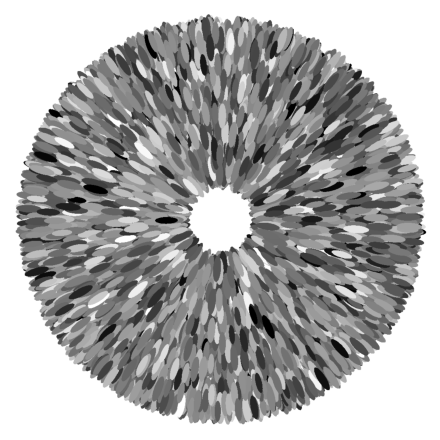

In [82]:
from dead_leaves import DeadLeavesModel, DeadLeavesImage
import torch

def angle_by_position(d):
    center_x = 512
    center_y = 512
    alpha = torch.arctan2(center_x - d["x_pos"], center_y - d["y_pos"])
    return alpha

position_mask = torch.zeros((1024, 1024))
X, Y = torch.meshgrid(
    torch.arange(1024),
    torch.arange(1024),
    indexing="xy",
)
dist_from_center = torch.sqrt((X - 512) ** 2 + (Y - 512) ** 2)
position_mask = (dist_from_center <= 470) & (dist_from_center >= 100)
position_mask = position_mask.to(bool)

model = DeadLeavesModel(
    "ellipsoid",
    {
        "area": {"uniform": {"low": 500.0, "high": 1000.0}},
        "aspect_ratio": {"constant": {"value": 0.3}},
        "orientation": {"constant": {"value": {'from': ["x_pos","y_pos"], "fn": angle_by_position}}},
    },
    (1024, 1024),
    position_mask,
)
leaves, partition = model.sample_partition()

color_params = {
    "gray": {"normal": {"loc": 0.5, "scale": 0.2}}
}

colormodel = DeadLeavesImage(
    leaves,
    partition,
    color_params,
    background_color=torch.tensor([1.0, 1.0, 1.0]),
)
image = colormodel.sample_image()
colormodel.show(image)